# <center> Examining the Intersection of Gender, Technology Usage in Finance, and Economic Impact </center>

  The initial spark for this project was my interest in ["The World Bank Open Data"](https://data.worldbank.org/). I wanted to leverage data to gain some insights into some global issues, and as a large and open source of data on a variety of topics, it seemd like a natural starting point. Discovering that they had an [API](https://documents.worldbank.org/en/publication/documents-reports/api), and that there was a [Python packge](https://pypi.org/project/wbgapi/) available for me to use, were the pleasant surprises that came with the datasets.
  
  The subject of the project emerged while exploring the dataset,a journey I would like to walk you to walk you through below. However, if you are short on time and only interested in the project's goals and conclusion, feel free to jump ahead to the sections with the same titles. Of course, there are no hurt feelings here &#x1F600;

## How should I start?

First step was installing the "wbgapi", a python package that facilitates access to the World Bank API. Using conda package manager, I simply used the following command:

conda install -c conda-forge wbgapi

Now, it was time to import the packages and dive deeper into the datasets:

In [1]:
# import packages 
import wbgapi as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import string

There were a good number of databases on different topics:

In [2]:
# checking out available databases
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-10-26
3,Worldwide Governance Indicators,WGI,3,2023-09-29
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2023-10-12
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-10-30
15,Global Economic Monitor,GEM,3,2023-07-21


 Among them, Gender Statistics, number 14, caught my attention:

In [3]:
# choosing "Gender Statistics" database:
SLCTD_DB = 14
wb.db = SLCTD_DB;

What subjects were covered under this topic? To answer this, I looked into the indicators of the database:

In [4]:
# looking into indicators:
wb.series.info()

id,value
account.t.d,Account (% age 15+)
account.t.d.1,"Account, female (% age 15+)"
account.t.d.2,"Account, male (% age 15+)"
borrow.any,Borrowed any money (% age 15+)
borrow.any.1,"Borrowed any money, female (% age 15+)"
borrow.any.2,"Borrowed any money, male (% age 15+)"
fin1.1a,First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab,First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b,First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d,Financial institution account (% age 15+)


I saw keywords from both worlds of Technology and Finance, and I wondered if gender affects the extent to which one relies on technology for finances. Does the gap seen in today's tech roles extend to the use of technology as well? And as such, the question of this project was born:

---
***
## Goal:
According to [an article](https://www.gracehopper.com/blog/gender-gap-in-technology#:~:text=According%20to%20a%20report%20from,face%20persistent%20inequality%20in%20tech.) from the Grace Hopper Team in 2023, *the percentage of women posessing tech roles is only 32%*. Does a similar gender gap exist in using technology for managing finances? Is this gap dependent on the country and its financial rank?

---
***

To answer this question, I picked the indicators that had Tech keywords in them including "digital", "mobile", "internet", and "online":

In [5]:
# finding indicators using selected Tech keywords
digital_series = wb.series.Series(q='digital').reset_index()
mobile_series = wb.series.Series(q='mobile').reset_index()
internet_series = wb.series.Series(q='internet').reset_index()
online_series = wb.series.Series(q='online').reset_index()

In [6]:
# merging all the found series into one:
tech_series = online_series.merge(
    internet_series.merge(
    digital_series.merge(
        mobile_series,how = 'outer'),how = 'outer'),how = 'outer')
                       

In [7]:
# checking out the resulting comprehensive series:
tech_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       62 non-null     object
 1   SeriesName  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [8]:
# deriving the names of all indicators:
tech_series_list = list(tech_series.iloc[:,0])
# ex:
tech_series_list[1]

'fin14b.t.d.1'

To assess the impact of a country's financial rank, I used a specific feature of the database: dividing responses based on the income of countries, **Low-Income Countries (LIC)** and **High-Income Countries (HIC)**. The contrast of these two types of countries served as the basis for investigating the impact of a country's economy on gender gap.

The indicators that did not cover both of these countries were not considered for further analysis.

In [9]:
# getting data for two economies
# leaving out series that didn't have data for our regions of interest
df = wb.data.DataFrame(series=tech_series_list,economy=['LIC','HIC'],time='all',skipBlanks=True).reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   economy  90 non-null     object 
 1   series   90 non-null     object 
 2   YR2014   19 non-null     float64
 3   YR2017   37 non-null     float64
 4   YR2021   84 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.6+ KB


In [10]:
df

,economy,series,YR2014,YR2017,YR2021
0,HIC,Internet,NaN,NaN,90.62
1,HIC,Own.phone,NaN,NaN,95.10
2,HIC,fin14.1.d,NaN,NaN,31.68
3,HIC,fin14.1.d.1,NaN,NaN,30.47
4,HIC,fin14.1.d.2,NaN,NaN,32.90
...,...,...,...,...,...
85,LIC,g20.t.d.2,14.89,27.26,39.95
86,LIC,merchant.pay,NaN,NaN,6.79
87,LIC,merchant.pay.1,NaN,NaN,5.33
88,LIC,merchant.pay.2,NaN,NaN,8.36


The information of the final dataframe above suggests that 90 indicators survived our criteria and the data includes two economy types for 3 time points; years 2014, 2017, and 2021. However, attending to non-null values demonstrates that not all indicators have been covered over all these three years and probably not for all economy types.

## Data Cleaning

There are a number of cleanliness and tidiness issues with the initial dataframe:

*(1)* Year can be a separate column with a simpler name and without the extra letters.

*(2)* The gender is hidden in name of the indicators and unclear. A separate column for it should be added. 

*(3)* Indicators' codes are hard to interpret and should be changed.

In [11]:
# time to tidy up the data:
# 1) year in a single column and with better naming
df_edtd = df.melt(id_vars=['economy','series'],var_name=['year'])
df_edtd['year'] = df_edtd['year'].str.lstrip('YR')

# changing type of year parameter to int:
df_edtd = df_edtd.copy()
df_edtd['year'] = df_edtd['year'].astype(int)
print(type(df_edtd['year'].iloc[0]))
df_edtd

<class 'numpy.int32'>


,economy,series,year,value
0,HIC,Internet,2014,NaN
1,HIC,Own.phone,2014,NaN
2,HIC,fin14.1.d,2014,NaN
3,HIC,fin14.1.d.1,2014,NaN
4,HIC,fin14.1.d.2,2014,NaN
...,...,...,...,...
265,LIC,g20.t.d.2,2021,39.95
266,LIC,merchant.pay,2021,6.79
267,LIC,merchant.pay.1,2021,5.33
268,LIC,merchant.pay.2,2021,8.36


In [12]:
# 2) finding the genders and putting them in a separate column:
# checking out Series Names in "tech_series"
for ii in range(0,5):
    print(tech_series.iloc[ii,0])
    print(tech_series.loc[ii,'SeriesName'])

fin14b.t.d
Used a mobile phone or the internet to buy something online (% age 15+)
fin14b.t.d.1
Used a mobile phone or the internet to buy something online, female (% age 15+)
fin14b.t.d.2
Used a mobile phone or the internet to buy something online, male (% age 15+)
fin14c2
Made a digital online payment for an online purchase for the first time after COVID-19 started (% age 15+)
fin14a.t.d
Used a mobile phone or the internet to pay bills (% age 15+)


Indicators focusing on male and female populatoins separately, have names ending with "2" and "1" respectively. The ones without any numbers at the end include all genders.

In [13]:
# stripping out the last number in "series" column
# and putting it under a new column called "series_gender"
# the remained part of the series name goes to another column called "series_code"
df_edtd[['series_code','series_gender']] = df_edtd['series'].str.extract(r'(.*?)(\.\d)$')
df_edtd

,economy,series,year,value,series_code,series_gender
0,HIC,Internet,2014,NaN,NaN,NaN
1,HIC,Own.phone,2014,NaN,NaN,NaN
2,HIC,fin14.1.d,2014,NaN,NaN,NaN
3,HIC,fin14.1.d.1,2014,NaN,fin14.1.d,.1
4,HIC,fin14.1.d.2,2014,NaN,fin14.1.d,.2
...,...,...,...,...,...,...
265,LIC,g20.t.d.2,2021,39.95,g20.t.d,.2
266,LIC,merchant.pay,2021,6.79,NaN,NaN
267,LIC,merchant.pay.1,2021,5.33,merchant.pay,.1
268,LIC,merchant.pay.2,2021,8.36,merchant.pay,.2


In [14]:
# filling in the new columns for the indicators that include All genders:
df_edtd['series_code'].fillna(df_edtd['series'],inplace=True)
df_edtd['series_gender'].fillna('All',inplace=True)
df_edtd

,economy,series,year,value,series_code,series_gender
0,HIC,Internet,2014,NaN,Internet,All
1,HIC,Own.phone,2014,NaN,Own.phone,All
2,HIC,fin14.1.d,2014,NaN,fin14.1.d,All
3,HIC,fin14.1.d.1,2014,NaN,fin14.1.d,.1
4,HIC,fin14.1.d.2,2014,NaN,fin14.1.d,.2
...,...,...,...,...,...,...
265,LIC,g20.t.d.2,2021,39.95,g20.t.d,.2
266,LIC,merchant.pay,2021,6.79,merchant.pay,All
267,LIC,merchant.pay.1,2021,5.33,merchant.pay,.1
268,LIC,merchant.pay.2,2021,8.36,merchant.pay,.2


In [15]:
# changing the "1" and "2" codes that represent genders with "F" and "M" for more clarity
# dropping the old column
df_edtd['series_gender'].replace('.1','F',inplace=True)
df_edtd['series_gender'].replace('.2','M',inplace=True)
df_edtd.drop('series',axis=1,inplace=True)
df_edtd

,economy,year,value,series_code,series_gender
0,HIC,2014,NaN,Internet,All
1,HIC,2014,NaN,Own.phone,All
2,HIC,2014,NaN,fin14.1.d,All
3,HIC,2014,NaN,fin14.1.d,F
4,HIC,2014,NaN,fin14.1.d,M
...,...,...,...,...,...
265,LIC,2021,39.95,g20.t.d,M
266,LIC,2021,6.79,merchant.pay,All
267,LIC,2021,5.33,merchant.pay,F
268,LIC,2021,8.36,merchant.pay,M


In [16]:
# changing the order of columns:
df_edtd = df_edtd[['economy','series_code','series_gender','year','value']]
df_edtd

,economy,series_code,series_gender,year,value
0,HIC,Internet,All,2014,NaN
1,HIC,Own.phone,All,2014,NaN
2,HIC,fin14.1.d,All,2014,NaN
3,HIC,fin14.1.d,F,2014,NaN
4,HIC,fin14.1.d,M,2014,NaN
...,...,...,...,...,...
265,LIC,g20.t.d,M,2021,39.95
266,LIC,merchant.pay,All,2021,6.79
267,LIC,merchant.pay,F,2021,5.33
268,LIC,merchant.pay,M,2021,8.36


In [17]:
df_edtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   economy        270 non-null    object 
 1   series_code    270 non-null    object 
 2   series_gender  270 non-null    object 
 3   year           270 non-null    int32  
 4   value          140 non-null    float64
dtypes: float64(1), int32(1), object(3)
memory usage: 9.6+ KB


In [18]:
# considering the large number of nulls and the number of data points that 
# remain after removing nulls, it's better to drop them:
df_edtd = df_edtd.dropna()
df_edtd

,economy,series_code,series_gender,year,value
25,HIC,g20.made.t.d,All,2014,82.27
26,HIC,g20.made.t.d,F,2014,82.03
27,HIC,g20.made.t.d,M,2014,82.51
28,HIC,g20.receive.t.d,All,2014,69.68
29,HIC,g20.receive.t.d,F,2014,67.38
...,...,...,...,...,...
265,LIC,g20.t.d,M,2021,39.95
266,LIC,merchant.pay,All,2021,6.79
267,LIC,merchant.pay,F,2021,5.33
268,LIC,merchant.pay,M,2021,8.36


In [19]:
# 3) giving indicators more meaningful names:
# checking out metadata for the indicators
remained_codes = df_edtd['series_code'].unique()
wb.series.info(remained_codes)

id,value
fin22a.c.MM.d,Borrowed any money from a formal financial institution or using a mobile money account (% age 15+)
fin13d,"Can use a mobile money account without help from anyone, including a mobile money agent (% age 15+)"
fin13d.s,"Can use a mobile money account without help from anyone, including a mobile money agent (% with a mobile money account, age 15+)"
Internet,Has access to the Internet (% age 15+)
fin14.1.d,Made a digital in-store merchant payment: using a mobile phone (% age 15+)
merchant.pay,Made a digital merchant payment (% age 15+)
g20.made.t.d,Made a digital payment (% age 15+)
g20.t.d,Made or received a digital payment (% age 15+)
mobileaccount.t.d,Mobile money account (% age 15+)
Own.phone,Own a mobile phone (% age 15+)


In [20]:
# codes of the indicators that should be changed:
remained_codes

array(['g20.made.t.d', 'g20.receive.t.d', 'g20.t.d', 'mobileaccount.t.d',
       'fin14a.t.d', 'fin14b.t.d', 'fin5.2017.d', 'Internet', 'Own.phone',
       'fin14.1.d', 'fin14a1.d', 'fin17a.17a1.d', 'fin17a1.d',
       'fin22a.c.MM.d', 'merchant.pay', 'fin13.1a', 'fin13.1a.s',
       'fin13.1b', 'fin13.1b.s', 'fin13.1c', 'fin13.1c.s', 'fin13.1d',
       'fin13.1d.s', 'fin13.1e', 'fin13.1e.s', 'fin13.1f', 'fin13.1f.s',
       'fin13a', 'fin13a.s', 'fin13d', 'fin13d.s'], dtype=object)

In [21]:
# picking new names for the "remained_codes" according to their descriptions:
new_names_codes = new_names_codes = [
                    'Made digit. payment','Recieved digit. payment','Made/received digit. payment',
                   'Have mobile account','Pay bills online','Buy online',
                   'Access account online','Have access to internet','Own mobile phone',
                   'Mobile payment in store','Sent money online','Saved at institution/using mobile accnt.',
                   'Saved using mobile accnt','Borrowed from institution/using mobile accnt',
                  'Made digit. merchant payment','no mobile accnt: agents too far(%all)',
                   'no mobile accnt: agents too far(%w.o. accnts)','no mobile accnt: products expensive(%all)',
                   'no mobile accnt: products expensive(%w.o. accnts)','no mobile accnt: not having docs(%all)',
                   'no mobile accnt: not having docs(%w.o. accnts)','no mobile accnt: insufficient money(%all)',
                    'no mobile accnt: insufficient money(%w.o. accnts)','no mobile accnt: payment by others(%all)',
                    'no mobile accnt: payment by others(%w.o. accnts)','no mobile accnt: no mobile phones(%all)',
                    'no mobile accnt: no mobile phones(%w.o. accnts)','used mobile accnt +2 times/a month(%all)',
                    'used mobile accnt +2 times/a month(%w. an accnt)', 'able to use mobile accnt w.o. help(%all)',
                    'able to use mobile accnt w.o. help(%w. an accnt)']

In [22]:
if len(new_names_codes)==len(remained_codes):
    print('All series have been renamed!')

All series have been renamed!


In [23]:
# Adding new indicator names:
df_edtd = df_edtd.copy()
df_edtd['new_codes']=df_edtd['series_code']
df_edtd['new_codes'].replace(remained_codes,new_names_codes,inplace=True)
df_edtd.rename(columns={'new_codes':'series_description'},inplace=True)
df_edtd

,economy,series_code,series_gender,year,value,series_description
25,HIC,g20.made.t.d,All,2014,82.27,Made digit. payment
26,HIC,g20.made.t.d,F,2014,82.03,Made digit. payment
27,HIC,g20.made.t.d,M,2014,82.51,Made digit. payment
28,HIC,g20.receive.t.d,All,2014,69.68,Recieved digit. payment
29,HIC,g20.receive.t.d,F,2014,67.38,Recieved digit. payment
...,...,...,...,...,...,...
265,LIC,g20.t.d,M,2021,39.95,Made/received digit. payment
266,LIC,merchant.pay,All,2021,6.79,Made digit. merchant payment
267,LIC,merchant.pay,F,2021,5.33,Made digit. merchant payment
268,LIC,merchant.pay,M,2021,8.36,Made digit. merchant payment


In [24]:
# dropping the old series_code column:
df_edtd2 = df_edtd[['economy','series_description','series_gender','year','value']]
df_edtd2

,economy,series_description,series_gender,year,value
25,HIC,Made digit. payment,All,2014,82.27
26,HIC,Made digit. payment,F,2014,82.03
27,HIC,Made digit. payment,M,2014,82.51
28,HIC,Recieved digit. payment,All,2014,69.68
29,HIC,Recieved digit. payment,F,2014,67.38
...,...,...,...,...,...
265,LIC,Made/received digit. payment,M,2021,39.95
266,LIC,Made digit. merchant payment,All,2021,6.79
267,LIC,Made digit. merchant payment,F,2021,5.33
268,LIC,Made digit. merchant payment,M,2021,8.36


About a dozen of indicators are focused on one topic: the reason for not having a mobile account. Therefore, it is better to put them in a separate dataframe. Another issue related to tidiness:

*(4)* Separating indicators focused on one specific topic.



In [25]:
#4) separating series indicators relavant to "reasons of not having a mobile account":
df_edtd_reasons = df_edtd2[df_edtd2['series_description'].str.contains('no mobile accnt:')]
df_edtd_not_reasons = df_edtd2[~df_edtd2['series_description'].str.contains('no mobile accnt:')]

# test: sum of length should be 140:
print(len(df_edtd_reasons))
print(len(df_edtd_not_reasons))
# 12+128 = 140

12
128


In [26]:
df_edtd_reasons = df_edtd_reasons.reset_index(drop=True)
df_edtd_reasons

,economy,series_description,series_gender,year,value
0,LIC,no mobile accnt: agents too far(%all),All,2021,14.64
1,LIC,no mobile accnt: agents too far(%w.o. accnts),All,2021,26.87
2,LIC,no mobile accnt: products expensive(%all),All,2021,15.10
3,LIC,no mobile accnt: products expensive(%w.o. accnts),All,2021,27.70
4,LIC,no mobile accnt: not having docs(%all),All,2021,18.62
5,LIC,no mobile accnt: not having docs(%w.o. accnts),All,2021,34.16
6,LIC,no mobile accnt: insufficient money(%all),All,2021,35.21
7,LIC,no mobile accnt: insufficient money(%w.o. accnts),All,2021,64.59
8,LIC,no mobile accnt: payment by others(%all),All,2021,9.57
9,LIC,no mobile accnt: payment by others(%w.o. accnts),All,2021,17.56


The 12 indicators that list the reasons for not having an account are all focused on "All" genders and only include "LIC" economy. It is clear that they can't be helpful in answering the main question. But as a side question it was interesting to find out the cause for not having a mobile account in the target population. So I cleaned this table as well. Two new separate columns for the type of reason and what percentage the value refers to, all or without accounts, should be added.

In [27]:
# discarding the redundant part before the ":" in the series_description
temp = df_edtd_reasons['series_description'].str.split(": ",expand=True)
df_edtd_reasons = df_edtd_reasons.copy()
df_edtd_reasons['series_description'] = temp.iloc[:,1]
df_edtd_reasons

,economy,series_description,series_gender,year,value
0,LIC,agents too far(%all),All,2021,14.64
1,LIC,agents too far(%w.o. accnts),All,2021,26.87
2,LIC,products expensive(%all),All,2021,15.10
3,LIC,products expensive(%w.o. accnts),All,2021,27.70
4,LIC,not having docs(%all),All,2021,18.62
5,LIC,not having docs(%w.o. accnts),All,2021,34.16
6,LIC,insufficient money(%all),All,2021,35.21
7,LIC,insufficient money(%w.o. accnts),All,2021,64.59
8,LIC,payment by others(%all),All,2021,9.57
9,LIC,payment by others(%w.o. accnts),All,2021,17.56


In [28]:
# dividing series_description into two colums, one part before the "("
# which is the reason and the second part shows the ref. point for value percentages
temp = df_edtd_reasons['series_description'].str.split("(",expand=True)
df_edtd_reasons['reason'] = temp.iloc[:,0]
df_edtd_reasons['% of'] = temp.iloc[:,1]
# dropping the old column:
df_edtd_reasons.drop(columns='series_description',inplace=True)
# removing extra ")" at the end
df_edtd_reasons['% of'] = df_edtd_reasons['% of'].str.rstrip(')').str.strip('%')
df_edtd_not_reasons = df_edtd_not_reasons.reset_index(drop=True)
df_edtd_reasons

,economy,series_gender,year,value,reason,% of
0,LIC,All,2021,14.64,agents too far,all
1,LIC,All,2021,26.87,agents too far,w.o. accnts
2,LIC,All,2021,15.10,products expensive,all
3,LIC,All,2021,27.70,products expensive,w.o. accnts
4,LIC,All,2021,18.62,not having docs,all
5,LIC,All,2021,34.16,not having docs,w.o. accnts
6,LIC,All,2021,35.21,insufficient money,all
7,LIC,All,2021,64.59,insufficient money,w.o. accnts
8,LIC,All,2021,9.57,payment by others,all
9,LIC,All,2021,17.56,payment by others,w.o. accnts


## Data Analysis
*(1)* Firs, focusing on the side question: what is the reason of not having a mobile account in LIC regions?

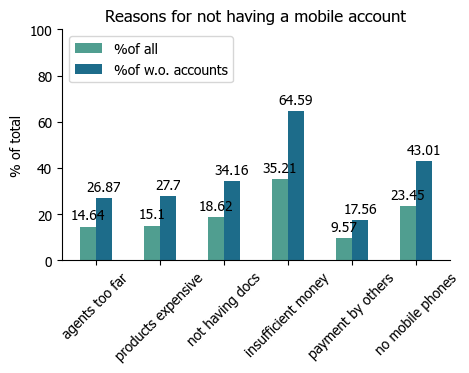

In [29]:
# setting font and palette type:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
sns.set_palette('crest',2)

# list of all reasons and all value types (%all and %w.o account)
all_units = df_edtd_reasons['% of'].unique().tolist()
all_reasons = df_edtd_reasons['reason'].unique().tolist()

# plotting the results as bar plot:
fig, ax = plt.subplots(figsize=(5,3)) 

x = np.arange(len(all_reasons))
multiplier = 0;
width = 0.25

for unit in all_units:
    val_all = df_edtd_reasons.loc[df_edtd_reasons['% of']==unit,'value']
    offset = width * multiplier
    
    rects = ax.bar(x + offset,val_all,width)#,label=all_reasons) #,alpha=.7)
    ax.bar_label(rects, padding=3)
    multiplier+=1

# Add some text for labels, title and custom x,y-axis tick labels, etc.
ax.set_ylabel('% of total')
ax.set_title('Reasons for not having a mobile account')
ax.set_xticks(x + width/2, all_reasons,rotation=45)
ax.legend(['%of all','%of w.o. accounts'],loc='upper left', ncols=1)
ax.set_ylim(0, 100) 

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

### Results (1):
The figure above shows that the reasons for not having a mobile money account in LIC regions in order of importance are:

1. Insufficient money
2. Not having a mobile phone
3. Not having required documents
4. Prodects expensive
5. Agents too far
6. Payment by others.

This pattern is similar for both units: %of all respndents and %of people who didn't have a mobile account. By using the World Bank website, I could find the source of this dataset which is The Global Findex Databse. If we refer to their website to access the [data](https://thedocs.worldbank.org/en/doc/7f53eaea4402fbc7b985f127446c9192-0430062022/original/GlobalFindex2021-MicrodataCodebook.pdf), under fin13  section we see that this data belongs exclusively to the adults in Sub-Saharan Africa who didn't have an account. Therefor, it is not surprising to have the same pattern across the two units. 

Lack of funds and not owninig a mobile phone are the main causes. Although, finding solutions for increasing financial resources of these adults may be a challenging and complicated task, if the goal is to increase using mobile accounts, initiatives that facilitate purchasing a mobile phone can help in achiving this target. 

---
***

*(2)* Second, the main question: is there a differnce in technology usage for financial needs between genders? How is this difference in LIC vs. HIC?

To answer this question I focused on inidcators that have separated responses based on gender categories and include both economy types.


In [30]:
# finding series indicators that have all genders
# and from them the ones that include both economy types

series_all_gender = list()

for i in df_edtd_not_reasons.series_description.unique():
    if len(df_edtd_not_reasons.loc
           [df_edtd_not_reasons['series_description']==i,'series_gender'].unique())==3:
        series_all_gender.append(i)

print('\n number of selected indicators:',len(series_all_gender))


 number of selected indicators: 12


In [31]:
# checking out the years covered in these series:
for i in series_all_gender:
    print(df_edtd_not_reasons.loc[df_edtd_not_reasons['series_description']==i,'year'].unique())
    

[2014 2017 2021]
[2014 2017 2021]
[2014 2017 2021]
[2017 2021]
[2017 2021]
[2017]
[2021]
[2021]
[2021]
[2021]
[2021]
[2021]


All indicators except for one, cover year 2021. So, we can base the comparison of the indicators across gender and economy on this year.

In [32]:
# finding all indicators from 2021:
df_all_2021 = df_edtd_not_reasons.loc[
    (df_edtd_not_reasons['series_description'].isin(series_all_gender)) &
                       (df_edtd_not_reasons['year']==2021)]

series_all_gender_2021 = df_all_2021['series_description'].unique().tolist()
print('Indicators from 2021:')
series_all_gender_2021

Indicators from 2021:


['Mobile payment in store',
 'Pay bills online',
 'Sent money online',
 'Buy online',
 'Saved at institution/using mobile accnt.',
 'Saved using mobile accnt',
 'Borrowed from institution/using mobile accnt',
 'Made digit. payment',
 'Recieved digit. payment',
 'Made/received digit. payment',
 'Made digit. merchant payment']

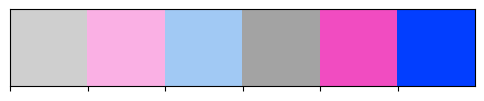

In [33]:
# making color palette for plots:
clrs = sns.color_palette('bright')
clrs_lic = sns.color_palette('pastel')
lic_palette= sns.color_palette([clrs_lic[7],clrs_lic[6],clrs_lic[0]])
hic_palette = sns.color_palette([clrs[7],clrs[6],clrs[0]])
my_palette = sns.color_palette([clrs_lic[7],clrs_lic[6],clrs_lic[0],clrs[7],clrs[6],clrs[0]])
sns.palplot(my_palette)
sns.set_palette(my_palette)

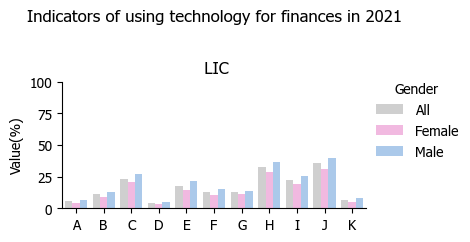

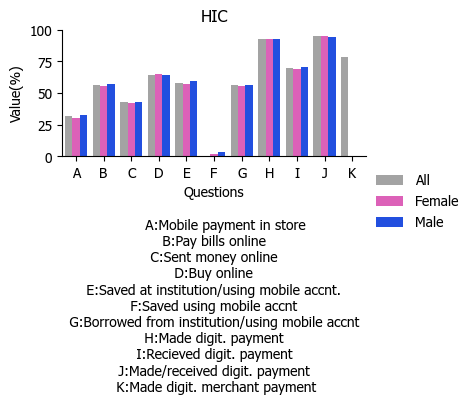

In [47]:
# plotting indicators for separate gender categories
# two plots: one for low income countries and one for high income countries

####### LIC ######
g = sns.catplot(data = df_all_2021.query("economy=='LIC'"), kind="bar",
x="series_description", y="value",hue='series_gender',
height=2, aspect=2,palette = lic_palette,legend_out=True)

# fix legend and replace labels:
legnd_title = 'Gender'
g._legend.set_title(legnd_title)
new_labels = ['All', 'Female','Male']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# fix figure aesthetics:    
g.set(xlabel='',ylabel='Value(%)',
      title='Indicators of using technology for finances in 2021\n\n\n LIC') 
g.set_xticklabels(string.ascii_uppercase[:11])
g.set(ylim=(0,100));


##### HIC ###########
g = sns.catplot(data = df_all_2021.query("economy=='HIC'"), kind="bar",
x="series_description", y="value",hue='series_gender',
height=2, aspect=2,palette = hic_palette,legend_out=True)

# fix figure aesthetics:
g.set_xticklabels(string.ascii_uppercase[:11])
g.set(ylim=(0,100));

# fix legend and replace labels:
legnd_title = ''
g._legend.set_title(legnd_title)
new_labels = ['All', 'Female','Male']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# adding caption to explain indicators:
g.set(xlabel='''Questions\n
      A:{} \n B:{} \n C:{} \n D:{} \n E:{} \n F:{} \n G:{} \n H:{} \n I:{} \n J:{} \n K:{}'''
      .format(series_all_gender_2021[0],series_all_gender_2021[1],series_all_gender_2021[2],
             series_all_gender_2021[3],series_all_gender_2021[4],series_all_gender_2021[5],
             series_all_gender_2021[6],series_all_gender_2021[7],series_all_gender_2021[8],
             series_all_gender_2021[9],series_all_gender_2021[10]),ylabel='Value(%)',title='HIC'); 



In [35]:
print('Differences in indicators for LIC region for Questions A-K resepectively \n (Diff.=Male-Female):')
df_all_2021.query("economy=='LIC'& series_gender=='M'").reset_index()['value']-df_all_2021.query("economy=='LIC'& series_gender=='F'").reset_index()['value']

Differences in indicators for LIC region for Questions A-K, resepectively 
 (Diff.=Male-Female)


0     2.86
1     4.00
2     6.35
3     1.89
4     7.17
5     5.06
6     2.86
7     7.72
8     6.30
9     8.73
10    3.03
Name: value, dtype: float64

### Results (2)
The figure above shows, unsurprisingly, that the overall percentage of using technology for financial purposes is higher in the HIC region compared to the LIC region. The only exception is saving (question F), which has a higher percentage in the LIC region, indicating that people with lower incomes tend to save more.

In the HIC region, the gender gap is almost nonexistent. The lower percentage for the female population in some indicators is very small and negligible. However, in the LIC region, the gap is more significant. The male population shows higher usage percentages in all categories, with differences ranging from 1.89% for buying online to 8.73% for making/receiving digital payments.

In both regions, making and receiving digital payments are the most popular among all the indicators. In the HIC region, technology is used the least for saving, mobile payment in-store, and sending money online, while in the LIC region, buying online, mobile payment in-store, and sending money online fall under this category. The most significant contrast between these two regions is observed in saving and buying online; these two have opposite patterns in these regions.

---
***

*(3) How have the tech usage and gender differences changed over the years?*

To make this comparison, the number of indicators reduced significantly as the data was not available for 2014 and 2017 for all indicators.

In [36]:
# creating a bar plot function with custom settings:
def barPlotsYears(df,ax):
    
    multiplier = 0;
    width = 0.25

    econs = ['LIC','HIC']  # economies
    offset = 0
    
    for i in range(0,len(econs)):
        
        dist = i*3
        for gen in ['All','F','M']:
            val_years = df.loc[(df['economy']==econs[i]) & (df['series_gender']==gen),'value']
            offset = width * multiplier
        
            x = dist + np.arange(0,len(val_years))
            rects = ax.bar(x + offset,val_years,width,alpha=i*.2+.8) 
            multiplier+=1
      
    # figure aesthetics:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_xlim([-.5,6.5])
    ax.set_ylim([0,100])


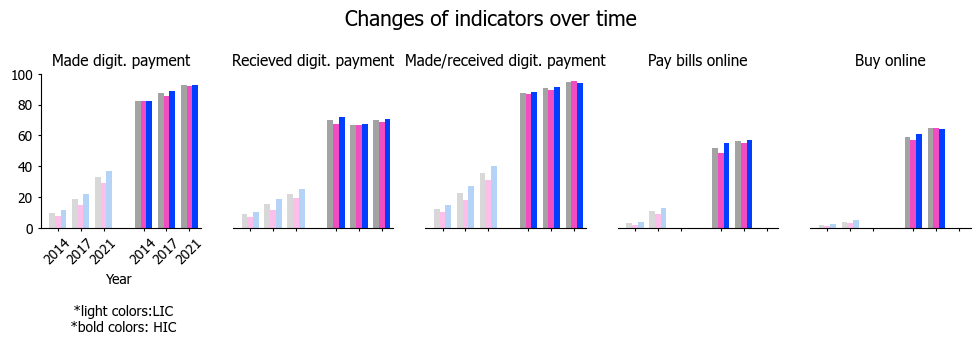

In [39]:
## plotting changes of indicators over the years

# selecting indicators with data for years other than 2021:
series_plot = series_all_gender[0:5]
df_all_over_years = df_edtd_not_reasons.loc[
    (df_edtd_not_reasons['series_description'].isin(series_plot))]

# creating the figure:
fig,ax = plt.subplots(1,5,figsize=[12,2])

for i in range(0,len(series_plot)):
    df_plot = df_all_over_years.loc[df_all_over_years['series_description']==series_plot[i]]
    barPlotsYears(df_plot,ax[i])
    
    ax[i].set_title(series_plot[i],{'fontsize':11})
    
    ax[i].set_xticks([.25,1.25,2.25,4,5,6])
    ax[i].tick_params('x',length=2,rotation=45)
    
    # figure aesthetics:
    if i==0:
        ax[i].set_xticklabels(['2014','2017','2021','2014','2017','2021'],fontsize=10)
        ax[i].set_xlabel('Year \n\n *light colors:LIC\n *bold colors: HIC')
        
        ax[i].tick_params('y',length=2)   
        ax[i].set_yticks(np.arange(0,101,20))
        ax[i].set_yticklabels(list(map(str,np.arange(0,101,20))))
    else:
        ax[i].spines['left'].set_visible(False)
        ax[i].set_xticklabels([])
        ax[i].set_yticks([])
        ax[i].set_yticklabels([])
        

# title:    
fig.suptitle('Changes of indicators over time',
             x=.5,y=1.2,fontsize=15);

### Results (3)
For both economies, indicators show an increase over time. The level of technology usage in 2014 for HIC was already quite high, so the degree of increase is not very large. However, the improvement for the LIC region over time is more significant.

In HIC, making and receiving digital payments for both male and female populations have changed fairly similarly. Still, when it comes to paying bills online and making online purchases, the improvement for the female population is more significant, enabling them to catch up with the male population.

In LIC areas, it is interesting to note that, although usage is improving, the gender gap doesn't seem to decrease. To narrow this gap further, an investigation into the reasons behind it is necessary.

## Conclusion


Unsurprisingly, we observe a significant difference (ranging from 8% to 70%) between indicators for the HIC region and the LIC region, regardless of gender. This suggests that the LIC region still needs improvement in many areas to catch up with the HIC region in utilizing technology for financial purposes. Moreover, the results indicate that the impact of gender on technology usage for finances depends on the economic situation of the country. While there is no gender gap in high-income countries concerning this issue, in low-income countries, the female population lags slightly behind the male population in usage percentages. The reasons for this phenomenon require further investigation. Is it because the female population prefers a more face-to-face approach due to increased communication requirements? Or is it due to a disadvantage in accessing technological knowledge and devices?

When I examined the reasons behind not having a mobile money account in Sub-Saharan Africa using the same dataset, the common reasons were insufficient money and lack of a mobile phone. This may provide insights into the reasons behind the gender gap as well. It is more likely that these causes affect the female population more profoundly, and we can conclude that disadvantages in financial and technological resources may contribute to this gap. However, as I mentioned, this is only an inference and requires further investigation.

Chronological data from the years 2014, 2017, and 2021 suggest that in the HIC region, the gender gap has been non-existent from our starting point. Only a slight difference in buying and paying bills online existed, which has disappeared over time. In the LIC region, the gender gap has persisted since 2014, and although the overall usage of technology for financial purposes has increased for all populations over time, the size of this gap has remained the same.

#### Data Source:
World Bank Group. ["Gender Statistics Database."](https://databank.worldbank.org/source/gender-statistics). Accessed [2023].

License:[Creative Commons Attribution 4.0 International License](https://data.worldbank.org/summary-terms-of-use)